# 第六章 机器人感知

## 1. 假设一个十字标志在天花板上，位置为$x_m$，$y_m$，$\theta_m$，使用相机观测标志的坐标为$x_i$，$y_i$，$\theta_i$，相机焦距为$f$，天花板高度为$h$，那么$x-y$平面的平移$d$投影到图像平面后为$d\frac{f}{h}$，请问：
- a): 当图像坐标为$(x_i, y_i, \theta_i)$，机器人位置为$(x_r, y_r, \theta_r)$时，求出十字标志的位置$(x_m, y_m, \theta_m)$
- b): 给出由机器人位置$(x_r, y_r, \theta_r)$和标记坐标$(x_m, y_m, \theta_m)$确定图像坐标$(x_i, y_i, \theta_i)$的公式
- c): 给出由标记坐标$(x_m, y_m, \theta_m)$和图像坐标$(x_i, y_i, \theta_i)$确定机器人位置$(x_r, y_r, \theta_r)$的公式
- d): 假设有多个坐标，讨论需要多少个标志可以唯一确定机器人的位置
注意：十字坐标是对称的

### a) 已知图像坐标和机器人位置坐标，求标志位置
图像坐标系与机器人坐标系一致，可以求得十字标志的坐标为
$$
\begin{bmatrix} x_m \\ y_m \\ \theta_m \end{bmatrix} = \begin{bmatrix} x_r \\ y_r\\ \theta_r \end{bmatrix} + \begin{bmatrix} \cos \theta_r & -\sin \theta_r &0 \\ \sin \theta_r & \cos \theta_r &0 \\ 0 &0 &1\end{bmatrix} \begin{bmatrix} x_i \frac{h}{f} \\ y_i \frac{h}{f} \\ \theta_i \end{bmatrix}
$$
考虑坐标的对称性，图像坐标的可能取值有四种$\theta_i + \frac{k\pi}{2}(k=0,1,2,3)$，因此标志坐标的角度也有四种取值$\theta_m + \frac{k\pi}{2}(k=0,1,2,3)$

### b) 已知机器人位置和标记坐标，求图像坐标
根据a）中公式可以方便推导出
$$
\begin{bmatrix} x_i  \\ y_i \\ \theta_i \end{bmatrix} = \begin{bmatrix} \cos \theta_r \frac{h}{f}& -\sin \theta_r \frac{h}{f}&0 \\ \sin \theta_r \frac{h}{f}& \cos \theta_r \frac{h}{f}&0 \\ 0 &0 &1\end{bmatrix}^{-1} \begin{bmatrix} x_m - x_r\\ y_m -y_r \\ \theta_m -\theta_r \end{bmatrix} 
$$

### c) 已知标记坐标和图像坐标，求机器人位置
根据 a)中公式依然可以计算出机器人位置，不过需要注意的是，这里需要先求出$\theta_r$，然后再计算$x_r,y_r$
$$
\begin{align}
\theta_r &= \theta_m - \theta_i \\
\begin{bmatrix} x_r \\ y_r \end{bmatrix} &= \begin{bmatrix} \cos \theta_r &-\sin \theta_r \\ \sin \theta_r &\cos \theta_r \end{bmatrix} \begin{bmatrix} x_i \\ y_i\end{bmatrix}
\end{align}
$$

需要注意的是，$\theta_i$有四种取值，因此$\theta_r$也有四种取值，最终导致$x_r,y_r$也存在四种取值

### d) 多少个标志可以唯一确定机器人的位置
两个标志可以唯一确定机器人的位置，因为两个十字标志就不再是中心对称的图形

## 2. 若坐标是非对称的倒T型，并且图像采样时存在高斯的噪声，均值为0，协方差为$\Sigma=\begin{bmatrix}\sigma^2 &0 &0 \\ 0 &\sigma^2 &0\\ 0 &0 &0 \end{bmatrix}$，计算下述三个问题的噪声分布
- a) 已知图像坐标和机器人位置，求标志坐标
- b) 已知机器人位置和标记坐标，求图像坐标
- c) 已知标记坐标和图像坐标，求机器人位置

### a) 已知图像坐标和机器人位置，求标志坐标

根据习题1中公式，考虑图像采样的高斯噪声，可以得到
$$
\begin{bmatrix} x_i  \\ y_i \\ \theta_i \end{bmatrix} 
= \begin{bmatrix} \cos \theta_r \frac{h}{f}& -\sin \theta_r \frac{h}{f}&0 \\ \sin \theta_r \frac{h}{f}& \cos \theta_r \frac{h}{f}&0 \\ 0 &0 &1\end{bmatrix}^{-1} \begin{bmatrix} x_m - x_r\\ y_m -y_r \\ \theta_m -\theta_r \end{bmatrix} + \epsilon \\
$$
令$A=\begin{bmatrix} \cos \theta_r \frac{h}{f}& -\sin \theta_r \frac{h}{f}&0 \\ \sin \theta_r \frac{h}{f}& \cos \theta_r \frac{h}{f}&0 \\ 0 &0 &1\end{bmatrix}$，可得

$$
\begin{bmatrix} x_i  \\ y_i \\ \theta_i \end{bmatrix}  \sim N(A^{-1} \begin{bmatrix} x_m - x_r\\ y_m -y_r \\ \theta_m -\theta_r \end{bmatrix}, \Sigma)
$$

根据高斯分布的可叠加性，可以得到
$$
\begin{bmatrix} x_m  \\ y_m \\ \theta_m \end{bmatrix}  \sim N( \begin{bmatrix} x_r \\ y_r \\ \theta_r \end{bmatrix} + A\begin{bmatrix} x_i\\ y_i \\ \theta_i \end{bmatrix}, A \Sigma A^T)
$$

### b) 已知机器人位置和标志坐标，求图像坐标
根据 a) 中结果可以方便得到 
$$
\begin{bmatrix} x_i  \\ y_i \\ \theta_i \end{bmatrix}  \sim N(A^{-1} \begin{bmatrix} x_m - x_r\\ y_m -y_r \\ \theta_m -\theta_r \end{bmatrix}, \Sigma)
$$

### c) 已知标志坐标和图像坐标，求机器人坐标
根据 a) 中结果可方便得到，需要首先计算$\theta_i$
$$
\theta_r = \theta_m - \theta_r \\
\begin{bmatrix} x_r  \\ y_r \\ \theta_r \end{bmatrix}  \sim N( \begin{bmatrix} x_m \\ y_m \\ \theta_m \end{bmatrix} - A\begin{bmatrix} x_i\\ y_i \\ \theta_i \end{bmatrix}, A \Sigma A^T)
$$

## 3. 实现sample_marker_model的例程，已知标志坐标 $X_m$ 和图像坐标 $X_i$ ，求机器人坐标 $X_r$ ，有以下五种情况，分别仿真采样



|序号 |$x_m$|$y_m$|$\theta_m$|$x_i$|$y_i$|$\theta_i$|$h/f$ |$\sigma^2$|
|----|-----|-----|----------|-----|-----|-----------|-----|----------|
|1   |0cm  |0cm  |0°        |0cm  |0cm  | 0°        |200  |$0.1cm^2$ |
|2   |0cm  |0cm  |0°        |1cm  |0cm  | 0°        |200  |$0.1cm^2$ |
|3   |0cm  |0cm  |0°        |2cm  |0cm  | 45°       |200  |$0.1cm^2$ |
|4   |0cm  |0cm  |0°        |3cm  |0cm  | 45°       |200  |$1.0cm^2$ |
|5   |50cm |150cm|10°       |1cm  |6cm  | 200°      |250  |$0.5cm^2$ |

In [1]:
import numpy as np

def marker_model(X_m, X_i, hf):
    n = X_i.shape[1]
    X_r = np.mat(np.zeros((3,n)))
    for i in range(n):
        X_r[2,i] = X_m[2,0] - X_i[2,i]
        A = hf * np.mat([[np.math.cos(X_r[2,i]), -np.math.sin(X_r[2,i])], [np.math.sin(X_r[2,i]), np.math.cos(X_r[2,i])]])
        X_r[0:2, i] = X_m[0:2,0] - A*X_i[0:2,i]
    return X_r

X_m = np.mat([[0],[0],[0]])
X_i = np.mat([[3,4,5],[3,4,5],[0,0,0]])
hf = 200

X_r = marker_model(X_m, X_i, hf)
print(X_r)

[[ -600.  -800. -1000.]
 [ -600.  -800. -1000.]
 [    0.     0.     0.]]


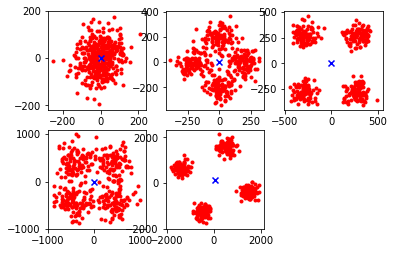

In [3]:
import matplotlib.pyplot as plt

X_ms = np.mat([[0,0,0,0,50],[0,0,0,0,150],[0,0,0,0,10/180*np.math.pi]])
X_is = np.mat([[0,1,2,3,1],[0,0,0,0,6],[0,0,45/180*np.math.pi,45/180*np.math.pi,200/180*np.math.pi]])
hfs = np.array([200,200,200,200,250])
sigma_s = np.array([0.1, 0.1, 0.1, 1.0, 0.5])
sigma_eigen = np.mat([[1,0,0],[0,1,0],[0,0,0]])
sample_nums = 100

fig = plt.figure()
for i in range(X_ms.shape[1]):
    ax = fig.add_subplot(2,3,1+i)
    for j in range(4):
        X_i_mean = np.array([X_is[0,i],X_is[1,i],X_is[2,i] + j*np.math.pi/2])
        sigma = sigma_eigen * sigma_s[i]
        X_i = np.random.multivariate_normal(mean=X_i_mean, cov=sigma, size=sample_nums)
        X_m = np.mat(X_ms[:,i])
        X_r = marker_model(X_m, np.mat(X_i.T), hfs[i])
        ax.scatter(np.array(X_r[0,:]), np.array(X_r[1,:]), c='r', marker='.')
    ax.scatter(X_ms[0,i], X_ms[1,i], c='b', marker='x')

plt.show()

## 4. 假设声呐传感器放在墙面前，范围为$d$，角度为$\Phi$，测量传感器检测墙壁的频率随$d$和$\Phi$的变化

若假设墙壁反射声波是漫反射，那么传感器检测墙壁的频率仅与声波传递方向到墙壁的距离相关，已知声速是$340m/s$，那么测量频率为
$$
f=\frac{v}{d/\cos\Phi}
$$

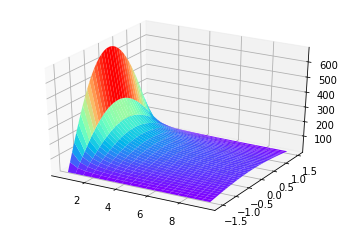

In [18]:
from mpl_toolkits.mplot3d import Axes3D

d = np.arange(0.5,10.0,0.5)
phi = np.arange(-np.math.pi/2,np.math.pi/2,5/180*np.math.pi)

d, phi = np.meshgrid(d, phi)
v = 340
f = v*np.divide(np.cos(phi),d)

fig=plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(d, phi, f, rstride=1, cstride=1, cmap='rainbow')

plt.show()

可以发现随着距离的增加，检测频率在迅速衰减，正对墙面时检测频率较高，侧对墙面时较低

## 总结

这一章介绍了